In [1]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

In [2]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [12]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import scipy
%matplotlib inline

In [4]:
from scipy.io import wavfile

path  = 'C:\\Users\\abcd2\\Desktop\\noisy_testset_wav\\noisy_testset_wav\\'
fname = 'p232_001.wav'
rate, data = wavfile.read(path + fname)
data = data

In [5]:
IPython.display.Audio(data=data, rate=rate)

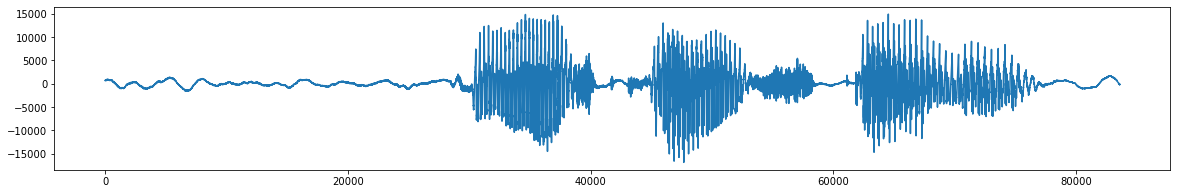

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [7]:
# 20-ms로 분리하기
def split_wav(data, sample_rate, start, end):
  start *= sample_rate
  end *= sample_rate
  return data[start:end]

In [8]:
signal = data[0:int(3.5 * rate)]
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

frame_size = 0.025
frame_stride = 0.001
frame_length, frame_step = frame_size * rate, frame_stride * rate
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))
pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + \
          np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]
edit_frames = pad_signal[indices.astype(np.int32, copy=False)]

In [ ]:
# 전체 넘파이 배열 요소 출력
#np.set_printoptions(threshold=784,linewidth=np.inf)

In [9]:
for i in range(len(frames)):
    len_half = len(frames[i]) // 2
    edit_frames[i][len_half:] = 0

In [10]:
print(frames[12])
print(edit_frames[12])

[24.61 19.73 27.7  ...  6.42 11.78 -8.71]
[24.61 19.73 27.7  ...  0.    0.    0.  ]


In [13]:
scipy.io.wavfile.write(r"newwavfile.wav", 16000, edit_frames[0])

In [14]:
path  = 'C:\\Users\\abcd2\\Desktop\\A-Convolutional-Recurrent-Neural-Network-for-Real-Time-Speech-Enhancement-master\\A-Convolutional-Recurrent-Neural-Network-for-Real-Time-Speech-Enhancement-master\\'
fname = 'newwavfile.wav'
rate, data = wavfile.read(path + fname)
data = data

In [15]:
IPython.display.Audio(data=data, rate=rate)

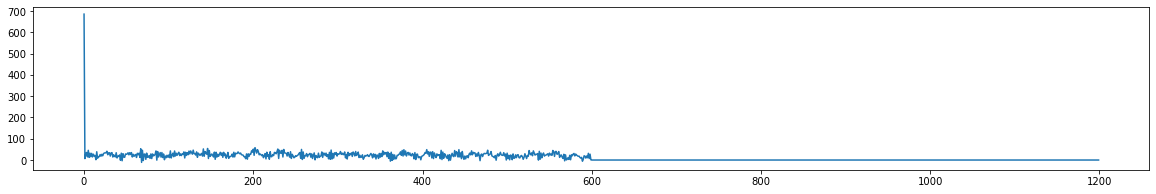

In [16]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)